# Parsing .m8 into graph 
(ChatGPT)
### Step 1: Parse the .m8 file

In [9]:
# counting runs
n = 1

replace "m8_file_path"

In [10]:
import pandas as pd

# Load the .m8 file into a pandas DataFrame
m8_file_path = f"./F189-search/alnResult.m8"
n += 1
columns = [
    'query', 'subject', 'percentage_identity', 'alignment_length',
    'mismatches', 'gap_opens', 'query_start', 'query_end', 
    'subject_start', 'subject_end', 'e_value', 'bit_score'
]
m8_df = pd.read_csv(m8_file_path, sep='\t', names=columns)

### Step 2: Create the network graph

In [11]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
for index, row in m8_df.iterrows():
    G.add_edge(row['query'], row['subject'], e_value=row['e_value'], bit_score=row['bit_score'])

### Step 3: Visualize the network

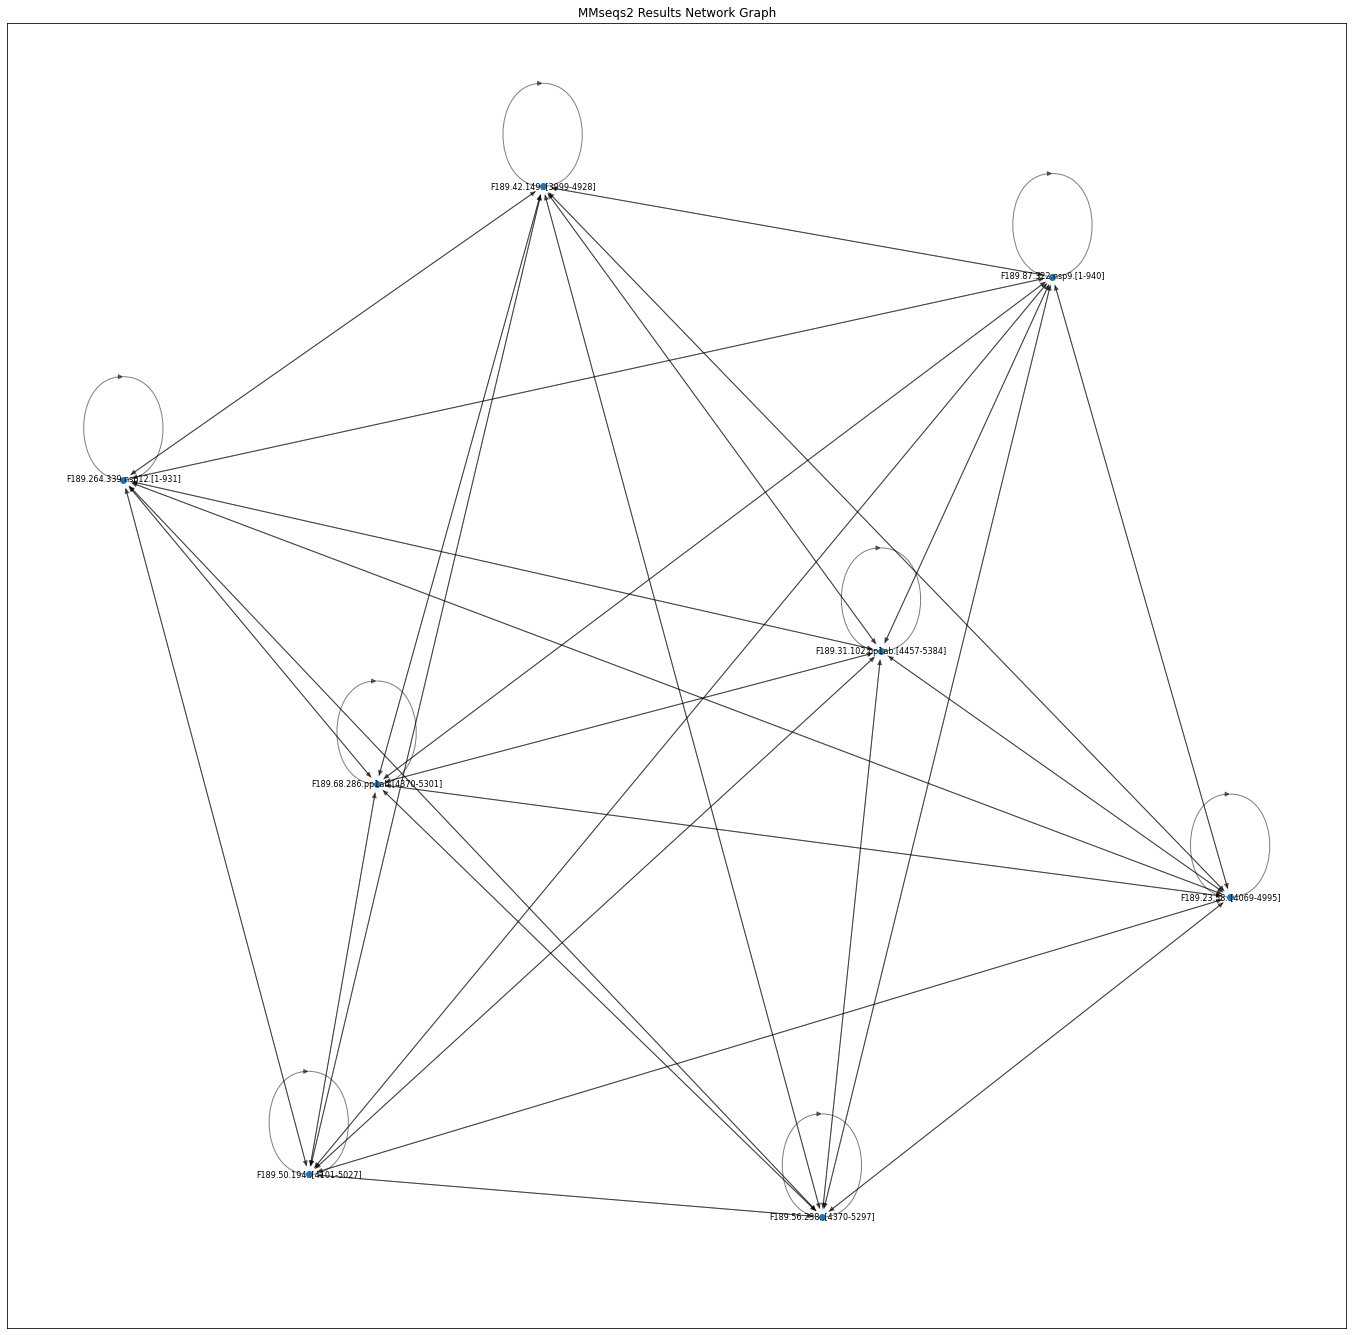

In [14]:
import matplotlib.pyplot as plt

# Draw the network graph
plt.figure(figsize=(24, 24))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=35)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('MMseqs2 Results Network Graph')
plt.show()

### Export to a file for visualization in Gephi

In [13]:
# Export to GraphML
nx.write_graphml(G, f"./F189-search/network_graph.{n}.graphml")

# Export to GEXF
nx.write_gexf(G, f"./F189-search/network_graph.{n}.gexf")